In [1]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

데이터 로드 및 저장

In [2]:
# train 데이터 전처리(이상치)
train_df = pd.read_csv('../../data/application_train.csv')

In [3]:
# 원본 데이터를 train_df2에 저장
train_df2 = train_df.copy()

극소수의 결측값이나 특이값을 포함하는 행들은 데이터프레임에서 제외

결측값 또는 이상치들 중 대체할 수 있는 값들은 대체

In [4]:
# code_gender 컬럼의 XNA(알수없음) 값을 포함한 행을 제외(4개)
train_df = train_df[train_df['CODE_GENDER'] != 'XNA']

In [5]:
# name_family_status 컬럼의 UNKNOWN(알수없음) 값을 포함한 행을 제외(2개) 
train_df = train_df[train_df['NAME_FAMILY_STATUS'] != 'UNKNOWN']

Text(0, 0.5, 'VALUE')

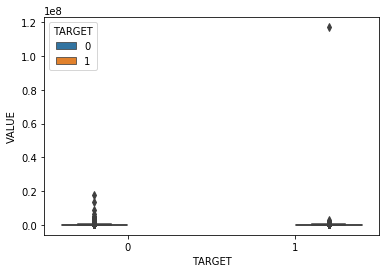

In [6]:
# AMT_INCOME_TOTAL 피쳐에 대한 boxplot 생성
sns.boxplot(x = 'TARGET', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data = train_df)
plt.ylabel('VALUE')

In [7]:
# AMT_INCOME_TOTAL 컬럼의 특이값(이상치)를 제외
train_df = train_df[train_df['AMT_INCOME_TOTAL'] != 117000000]

Text(0, 0.5, 'VALUE')

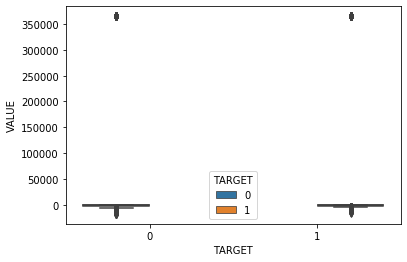

In [8]:
# AMT_INCOME_TOTAL 피쳐에 대한 boxplot 생성
sns.boxplot(x = 'TARGET', y = 'DAYS_EMPLOYED', hue = 'TARGET', data = train_df)
plt.ylabel('VALUE')

In [9]:
# DAYS_EMPLOYED 컬럼의 이상치를 nan 값으로 변경
train_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

Text(0, 0.5, 'COUNT')

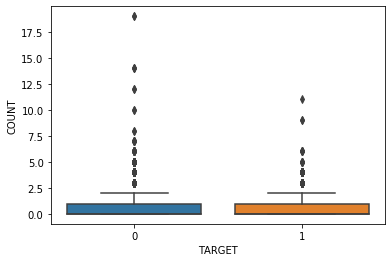

In [10]:
# CNT_CHILDREN 피쳐에 대한 boxplot 생성
sns.boxplot(x= 'TARGET', y = 'CNT_CHILDREN', data = train_df)
plt.ylabel('COUNT')

In [11]:
# CNT_CHILDREN(자녀 수)가 특이하게 높은 행을(2개) 제외
train_df = train_df[train_df['CNT_CHILDREN'] != 19]

In [12]:
# 차가 있는데 연식이 쓰여있지 않은 행(5개) 제외
train_df = train_df.drop(train_df[(train_df.FLAG_OWN_CAR == 'Y') & (train_df.OWN_CAR_AGE.isnull())].index)

In [13]:
# 최종 train_df 확인
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


test 데이터에도 마찬가지로 전처리(결측치 및 이상치)

test 데이터의 행은 삭제할 수 없으므로(제출파일에 모든 행 반드시 포함) 대체 가능한 값들을 대체함

In [14]:
# 데이터 로드
test_df = pd.read_csv('../../data/application_test.csv')

In [15]:
# test데이터에서도 마찬가지로 365243을 nan 값으로 변경
test_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [16]:
# test 데이터에서도 자녀수가 20인 행에 대해 nan값으로 변경
test_df['CNT_CHILDREN'].replace(20, np.nan, inplace= True)

In [17]:
# 확인
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(67), int64(38), object(16)
memory usage: 45.0+ MB


In [18]:
def cat_encoding(df):
    le = LabelEncoder()
    original_columns = list(df.columns)
    
    for col in df:
        # df의 컬럼의 유형이 object인 것들만
        if df[col].dtype == 'object':
            
            # df의 컬럼별로 포함된 개체 수가 2개 이하이면 LabelEncoding
            if len(list(df[col].unique())) <= 2:
                le.fit(df[col])
                df[col] = le.transform(df[col])

            # df의 컬럼별로 포함된 개체 수가 3개 이상이면 ont-hot-encoding
            elif len(list(df[col].unique())) > 2:            
                df = pd.get_dummies(df, columns = [col], dummy_na=False)
    # 새롭게 만들어진 컬럼들의 이름을 리스트로 저장
    new_columns = [c for c in df.columns if c not in original_columns]
    
    # 수치형으로 변경된 df를 반환
    return df

train, test 데이터프레임에서 변수가 포함하는 값의 내용이 중복되지 않는 값들을 포함할 수 있기 때문에, 

두 데이터프레임을 합친 후 카테고리 변수를 수치형 변수로 변환하는 과정을 진행.

이후 다시 두 데이터프레임을 나누고 최종적으로 작업한 데이터프레임을 파일로 저장.

In [23]:
#  train, test 데이터 프레임을 병합
df = train_df.append(test_df)

# 카테고리 변수를 수치형 변수로 변환
df = cat_encoding(df)

# 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356243 entries, 0 to 48743
Columns: 241 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(70), int32(4), int64(38), uint8(129)
memory usage: 345.5 MB


In [27]:
# TARGET을 기준으로 결측값인 부분은 test로, 결측값이 아닌 부분은 train으로 다시 나누어 줌
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

# 병합하고 분리하는 과정에서 생긴 TARGET 변수를 삭제
test_df = test_df.drop(columns = ['TARGET'])

In [28]:
# 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Columns: 241 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(70), int32(4), int64(38), uint8(129)
memory usage: 298.2 MB


In [29]:
# 확인
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 240 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(69), int32(4), int64(38), uint8(129)
memory usage: 46.9 MB


In [30]:
# 간단한 전처리를 끝낸 train, test 테이블을 joblib파일로 저장 
joblib.dump(filename= "train_df.joblib", value=train_df)
joblib.dump(filename= "test_df.joblib", value=test_df)

['test_df.joblib']